In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import itertools as it
%matplotlib inline

In [3]:
#read csv file
portfolio = pd.read_csv('Portfolio.csv',parse_dates=True,index_col='T')


In [4]:
#tranform this into a matrix
X = portfolio.as_matrix()

#the last column is the target
Y = X[:,-1]

#create the design matrix2
X = X[:,0:-1]

index_name = portfolio.columns[:-1]
p=len(index_name)

In [5]:
#setting up the model
ols_model = linear_model.LinearRegression(fit_intercept=False)
ols_model.fit(X,Y)

#evaluating the model
print('R_squared = %s \n' %ols_model.score(X,Y))

i = 0
for c in ols_model.coef_:
    print('coefficient for ' + portfolio.columns[i] + ':  ' + str(c))
    i+=1



R_squared = 0.571870367284 

coefficient for DAX:  0.319619081774
coefficient for NKY:  0.404230248849
coefficient for SPX:  0.390228089536
coefficient for SX5E:  -0.142273132805
coefficient for SX7E:  0.190208447186
coefficient for SXAP:  -0.235583187135
coefficient for SXKP:  0.351287538566


In [6]:
#storing all the R2
models=dict()

#variable to store the best model for every prediction k
best_model = dict()
best_model_RSS = np.arange(0,p,1)*1.00
for k in np.arange(1,p+1,1):
    RSS  = []
    best_model[k] = []
    best_rss = len(Y) 
    combination = list(it.permutations(np.arange(0,p,1),int(k)))
    for c in combination:
        ols_model = linear_model.LinearRegression(fit_intercept=False)
        ols_model.fit(X[:,list(c)],Y)
        r_squared = ols_model.score(X[:,list(c)],Y)
        Y_Predict = ols_model.predict(X[:,list(c)])
        rss = np.sum((Y_Predict-Y)*(Y_Predict-Y))
        RSS.append(rss)
        if rss < best_rss:
            best_model[k] = c
            best_rss = rss
    best_model_RSS[k-1] = best_rss
    i +=1
    models[k]=RSS


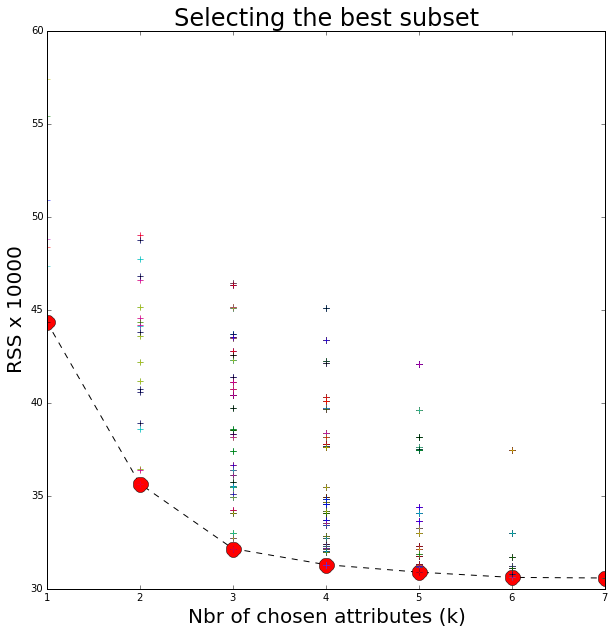

In [147]:
fig = plt.figure(figsize = (10,10))
plt.plot(np.arange(1,p+1,1),best_model_RSS*10000,marker='o',markerfacecolor='red',
         markersize=15,linestyle='--',color='black',label='best set')
plt.xlabel('Nbr of chosen attributes (k)',fontsize=20)
plt.ylabel('RSS x 10000',fontsize=20)
plt.title('Selecting the best subset',fontsize=24)
for k in np.arange(1,p+1,1):
    for m in models[k]:
        plt.plot(k,m*10000,marker='+',markerfacecolor='black')

In [149]:
best_model

{1: (6,),
 2: (1, 6),
 3: (1, 2, 6),
 4: (1, 4, 2, 6),
 5: (1, 2, 5, 4, 6),
 6: (0, 2, 4, 5, 6, 1),
 7: (0, 6, 2, 5, 1, 4, 3)}